In [1]:
from platform import python_version
print(python_version())

3.12.2


In [2]:
import qiskit
import qc_grader
print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.1.0
Grader version: 0.22.9


In [3]:
my_api_key = "t4SaSm0u3PpVF6F37re2Lh1FX5AgoNGYehruBWHdlCZk"
my_crn = "crn:v1:bluemix:public:quantum-computing:us-east:a/ff7f43f84b444e79908bf5eacca87d7c:7523b14e-0801-4c56-992b-4ab44df0f836::"

from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel = "ibm_quantum_platform",
    token = my_api_key,
    instance = my_crn,
    name = "qgss-2025",
    overwrite=True
)

In [4]:
service = QiskitRuntimeService(name = "qgss-2025")
service.saved_accounts()

{'account-name': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': '7p9bCdqlSo3nlp2FNDPGJjpLC78wxy_JJDHyzzV_dwCe',
  'instance': 'crn:v1:bluemix:public:quantum-computing:eu-de:a/624a449c58db4cebbbcd6d44cd96889e:84f0afd8-a97d-449f-ade8-8c52ea820862::',
  'verify': True,
  'private_endpoint': False},
 'default-ibm-quantum': {'channel': 'ibm_quantum',
  'url': 'https://auth.quantum.ibm.com/api',
  'token': '7p9bCdqlSo3nlp2FNDPGJjpLC78wxy_JJDHyzzV_dwCe',
  'verify': True,
  'private_endpoint': False},
 'default-ibm-quantum-platform': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': '7p9bCdqlSo3nlp2FNDPGJjpLC78wxy_JJDHyzzV_dwCe',
  'instance': 'crn:v1:bluemix:public:quantum-computing:eu-de:a/624a449c58db4cebbbcd6d44cd96889e:84f0afd8-a97d-449f-ade8-8c52ea820862::',
  'verify': True,
  'private_endpoint': False},
 'my-quantum-account': {'channel': 'ibm_quantum',
  'url': 'https://auth.quantum.ibm.com/api',
  'token': 'c48268e836ab

In [5]:
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator
from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import grade_lab0_ex1, grade_lab0_ex2

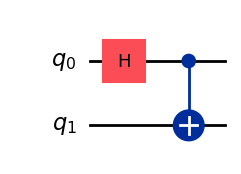

In [6]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw("mpl")

# Generate a three-qubit GHZ state using Qiskit patterns

## Step 1. Map

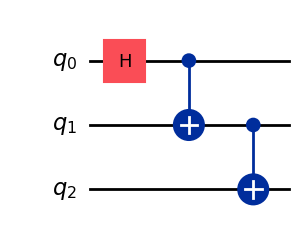

In [8]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.draw("mpl")

In [9]:
grade_lab0_ex1(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## Step 2. Optimize


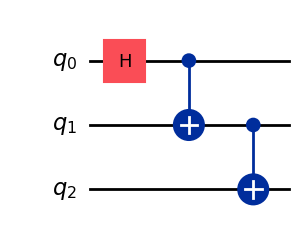

In [10]:
coupling_map = [[0, 1], [0, 2]]

pm = generate_preset_pass_manager()
qc_transpiled = pm.run(qc)

qc_transpiled.draw("mpl")

In [11]:
grade_lab0_ex2(qc_transpiled)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## Step 3. Execute

In [12]:
qc.measure_all()

backend = AerSimulator()
sampler = Sampler(mode = backend)

pm = generate_preset_pass_manager(backend = backend, optimization_level=1)
job = sampler.run(pm.run([qc]))

results_sampler = job.result()

In [13]:
estimator = Estimator(mode=backend)

ZZZ = SparsePauliOp("ZZZ")
ZZX = SparsePauliOp("ZZX")
ZII = SparsePauliOp("ZII")
XXI = SparsePauliOp("XXI")
ZZI = SparsePauliOp("ZZI")
III = SparsePauliOp("III")
observables = [ZZZ, ZZX, ZII, XXI, ZZI, III]

pub = (qc, observables)
job = estimator.run(pubs = [pub])

results_estimator = job.result()

## Step 4. Post-process

   Outcomes : {'111': 561, '000': 463}


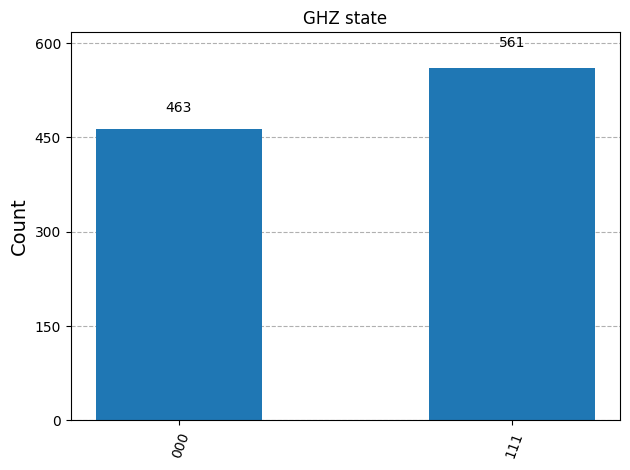

In [14]:
counts_list = results_sampler[0].data.meas.get_counts()
print(f"   Outcomes : {counts_list}")
display(plot_histogram(counts_list, title = "GHZ state"))

Expectation values: [('ZZZ', np.float64(0.00634765625)), ('ZZX', np.float64(-0.0244140625)), ('ZII', np.float64(-0.0078125)), ('XXI', np.float64(0.0029296875)), ('ZZI', np.float64(1.0)), ('III', np.float64(1.0))]


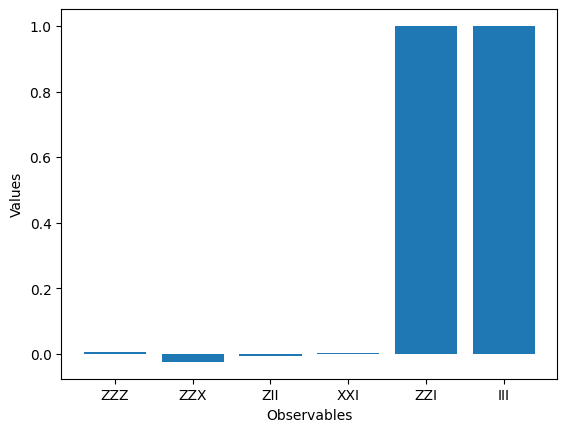

In [16]:
exp_values = results_estimator[0].data.evs
observables_list = ["ZZZ", "ZZX", "ZII", "XXI", "ZZI", "III"]
print(f"Expectation values: {list(zip(observables_list, exp_values))}")

container = plt.bar(observables_list, exp_values, width = 0.8)

plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

In [17]:
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 1419 participants have completed this lab
Lab 1: 0/9 exercises completed (0%)
    ✅ 531 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ✅ 1 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 0 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 0 participants have completed this lab
